In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd
!ls drive/MyDrive/CS-GY-6913-Project/

/content
'Experiment Result - CS6913.csv'  'Experiment Result - CS6913.xlsx'   plot.ipynb


In [44]:
# Load the data
file_path = "drive/MyDrive/CS-GY-6913-Project/Experiment Result - CS6913.csv"  # Update with your file name if necessary
data = pd.read_csv(file_path)


# Part 1: Comparison of Bi-Encoders

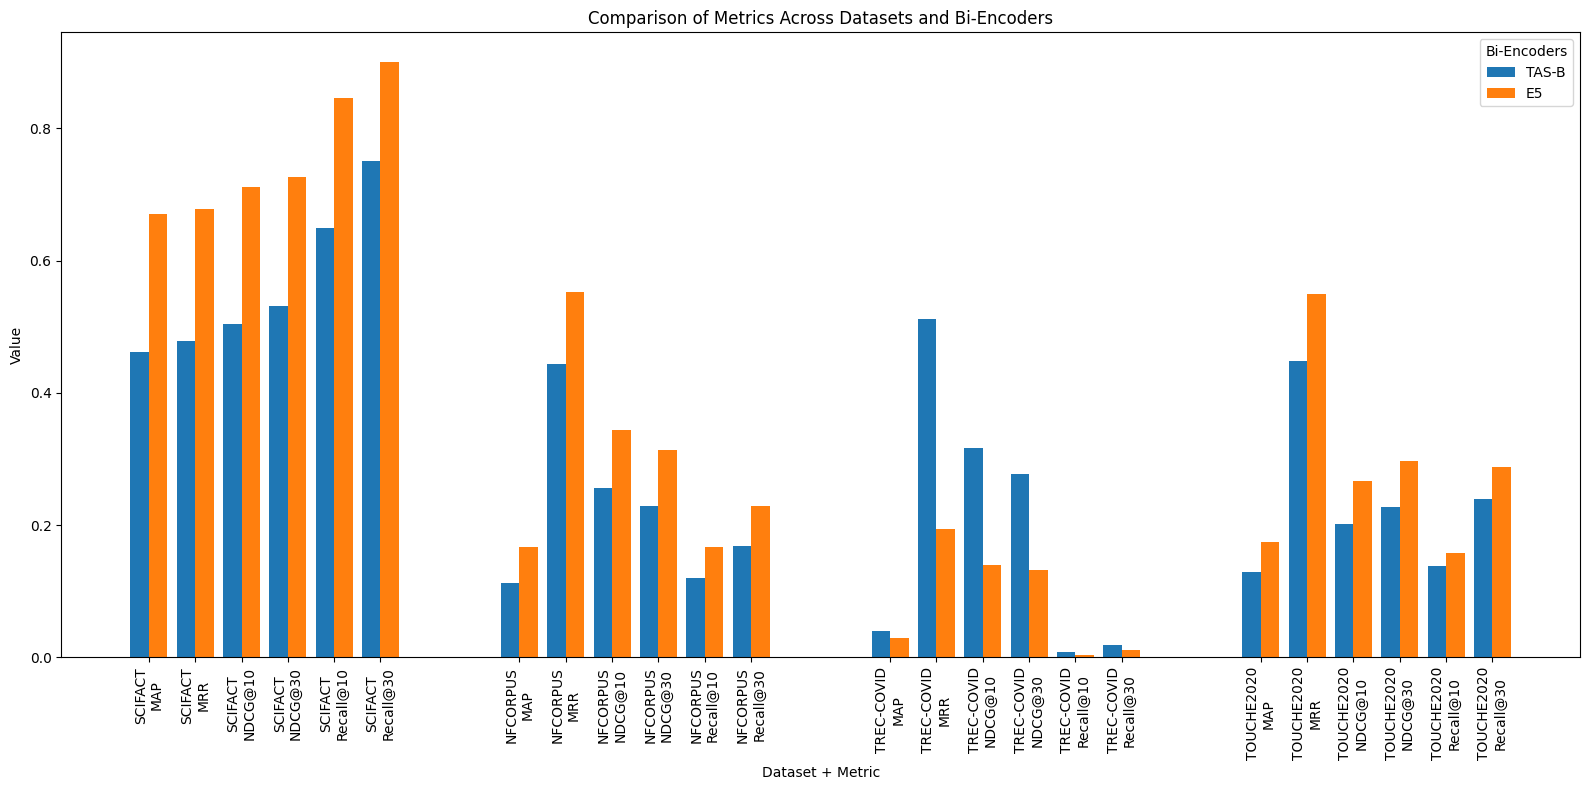

In [8]:
# Filter the data for bi-encoders without fine-tuning and no cross-encoder
filtered_data = data[
    (data['Fine-Tuned'] == 'No') & (data['Cross-Encoder'] == 'No')
]

# Select datasets and metrics
datasets = filtered_data['Dataset'].unique()
bi_encoders = filtered_data['Bi-Encoder'].unique()
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Initialize data for the plot
plot_data = []
xticks = []
dataset_separator = 2  # Number of empty slots between datasets

# Prepare data for plotting with space between datasets
x_positions = []
current_x = 0  # Starting x position

for dataset in datasets:
    for metric in metrics:
        xticks.append(f"{dataset}\n{metric}")  # Add label for x-axis
        values = filtered_data.loc[filtered_data['Dataset'] == dataset, metric].values
        plot_data.append(values)
        x_positions.append(current_x)
        current_x += 1  # Move to the next x position
    current_x += dataset_separator  # Add spacing between datasets

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))
width = 0.4  # Width of each bar

# Plot data for each bi-encoder
for i, encoder in enumerate(bi_encoders):
    # Collect values for the current bi-encoder
    encoder_values = [v[i] for v in plot_data if len(v) > i]
    # Plot bars with offset for each bi-encoder
    ax.bar(
        [pos + (i - 0.5) * width for pos in x_positions],  # Adjust x positions
        encoder_values,
        width,
        label=encoder
    )

# Add labels, title, and legend
ax.set_xlabel('Dataset + Metric')
ax.set_ylabel('Value')
ax.set_title('Comparison of Metrics Across Datasets and Bi-Encoders')
ax.set_xticks(x_positions)
ax.set_xticklabels(xticks, rotation=90)
ax.legend(title='Bi-Encoders')

# Display the plot
plt.tight_layout()
plt.show()

# Part 2: Comparison of Cross-Encoders

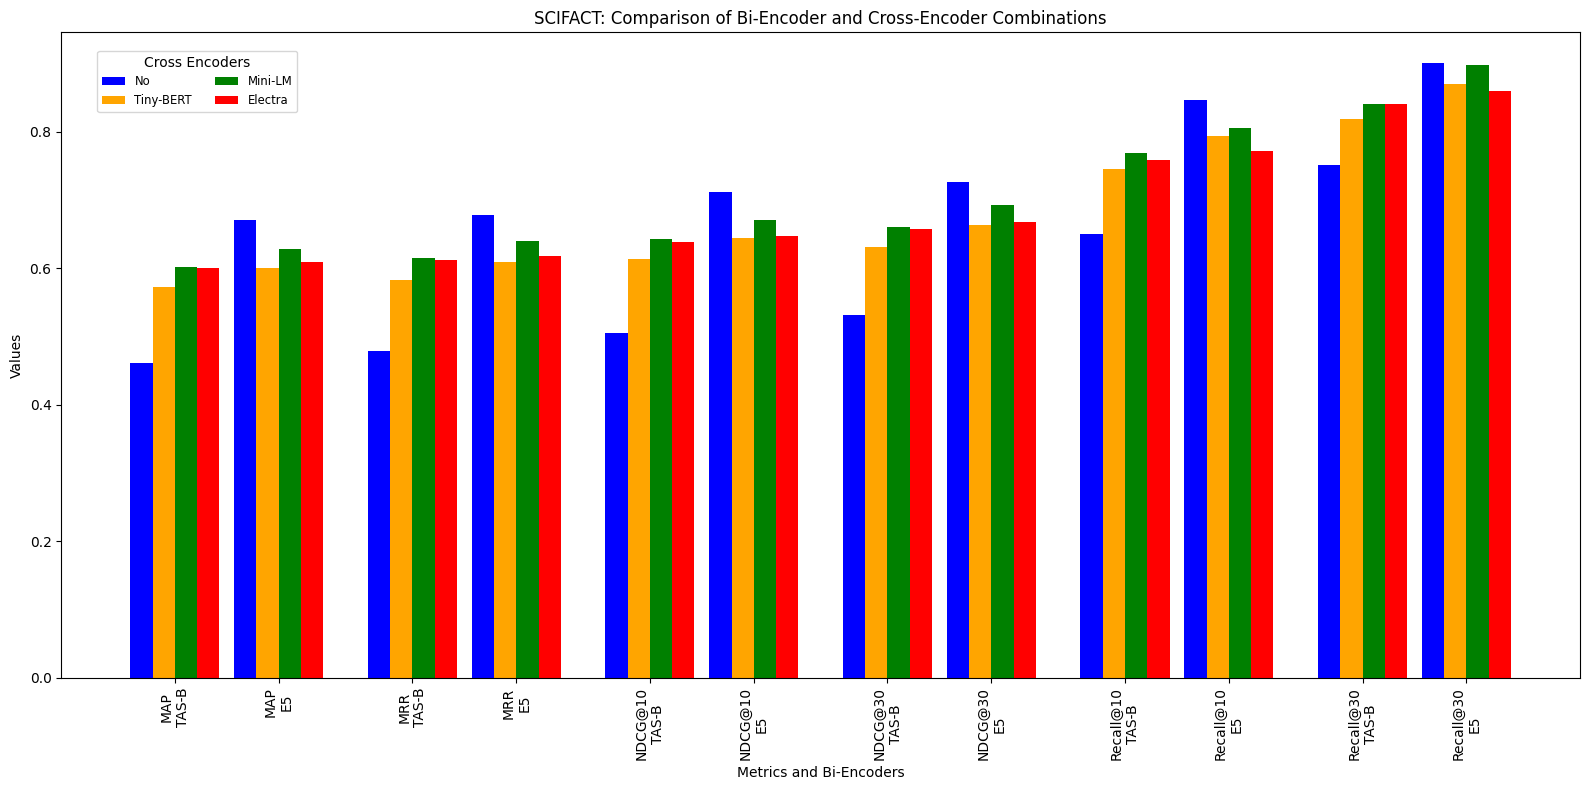

In [37]:
dataset_name = 'SCIFACT'

# Filter the data for SCIFACT dataset without fine-tuning
filtered_data = data[
    (data['Dataset'] == dataset_name) & (data['Fine-Tuned'] == 'No')
]

# Select bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Specify bi-encoders to ensure the order
cross_encoders = ['No', 'Tiny-BERT', 'Mini-LM', 'Electra']  # Specify cross-encoders in the required order
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Prepare data for plotting
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.2  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Create x positions for bars
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder in cross_encoders:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoders)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoders) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.15  # Width of each bar
colors = ['blue', 'orange', 'green', 'red']  # Ensure consistent colors for cross-encoders

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoders) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoders[j]}" if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title(f'{dataset_name}: Comparison of Bi-Encoder and Cross-Encoder Combinations')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoders):(i + 1) * len(cross_encoders)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend inside the plot, in the upper left corner
ax.legend(
    title='Cross Encoders',
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()

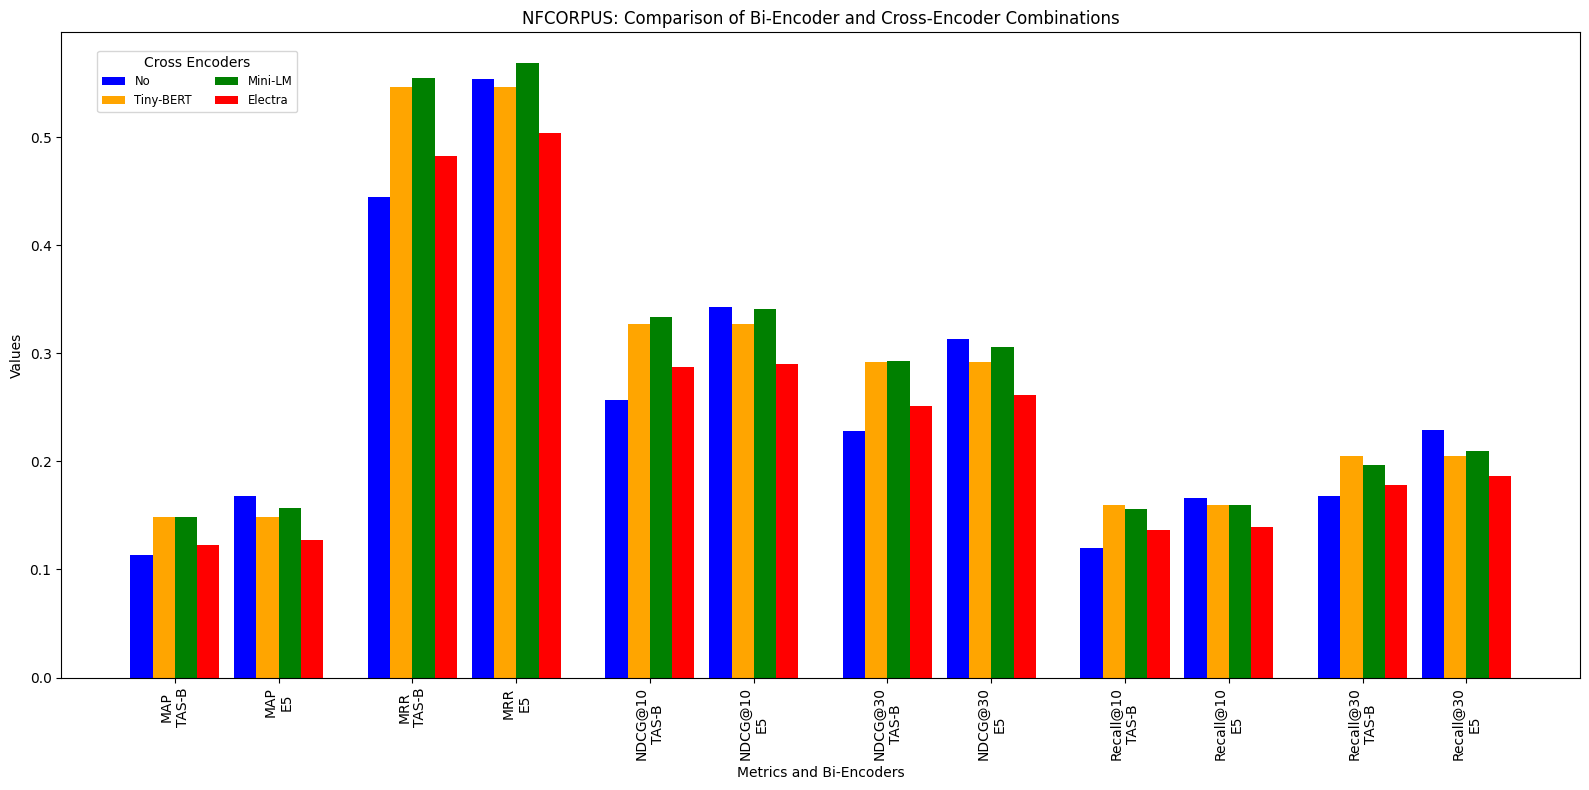

In [39]:
dataset_name = 'NFCORPUS'

# Filter the data for NFCORPUS dataset without fine-tuning
filtered_data = data[
    (data['Dataset'] == dataset_name) & (data['Fine-Tuned'] == 'No')
]

# Select bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Specify bi-encoders to ensure the order
cross_encoders = ['No', 'Tiny-BERT', 'Mini-LM', 'Electra']  # Specify cross-encoders in the required order
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Prepare data for plotting
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.2  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Create x positions for bars
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder in cross_encoders:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoders)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoders) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.15  # Width of each bar
colors = ['blue', 'orange', 'green', 'red']  # Ensure consistent colors for cross-encoders

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoders) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoders[j]}" if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title(f'{dataset_name}: Comparison of Bi-Encoder and Cross-Encoder Combinations')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoders):(i + 1) * len(cross_encoders)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend inside the plot, in the upper left corner
ax.legend(
    title='Cross Encoders',
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()

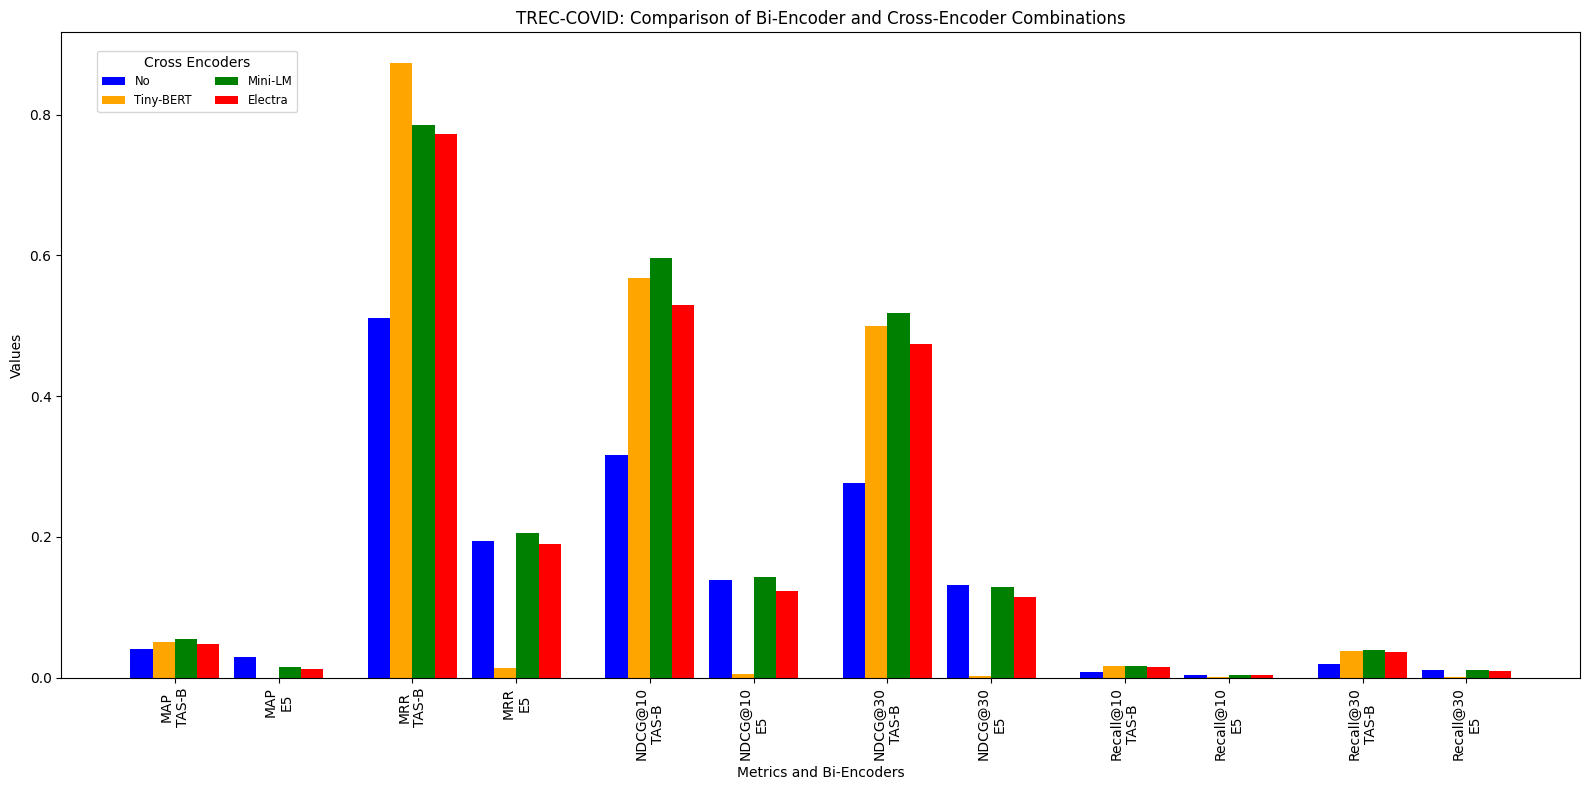

In [40]:
dataset_name = 'TREC-COVID'

# Filter the data for TREC-COVID dataset without fine-tuning
filtered_data = data[
    (data['Dataset'] == dataset_name) & (data['Fine-Tuned'] == 'No')
]

# Select bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Specify bi-encoders to ensure the order
cross_encoders = ['No', 'Tiny-BERT', 'Mini-LM', 'Electra']  # Specify cross-encoders in the required order
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Prepare data for plotting
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.2  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Create x positions for bars
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder in cross_encoders:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoders)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoders) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.15  # Width of each bar
colors = ['blue', 'orange', 'green', 'red']  # Ensure consistent colors for cross-encoders

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoders) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoders[j]}" if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title(f'{dataset_name}: Comparison of Bi-Encoder and Cross-Encoder Combinations')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoders):(i + 1) * len(cross_encoders)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend inside the plot, in the upper left corner
ax.legend(
    title='Cross Encoders',
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()

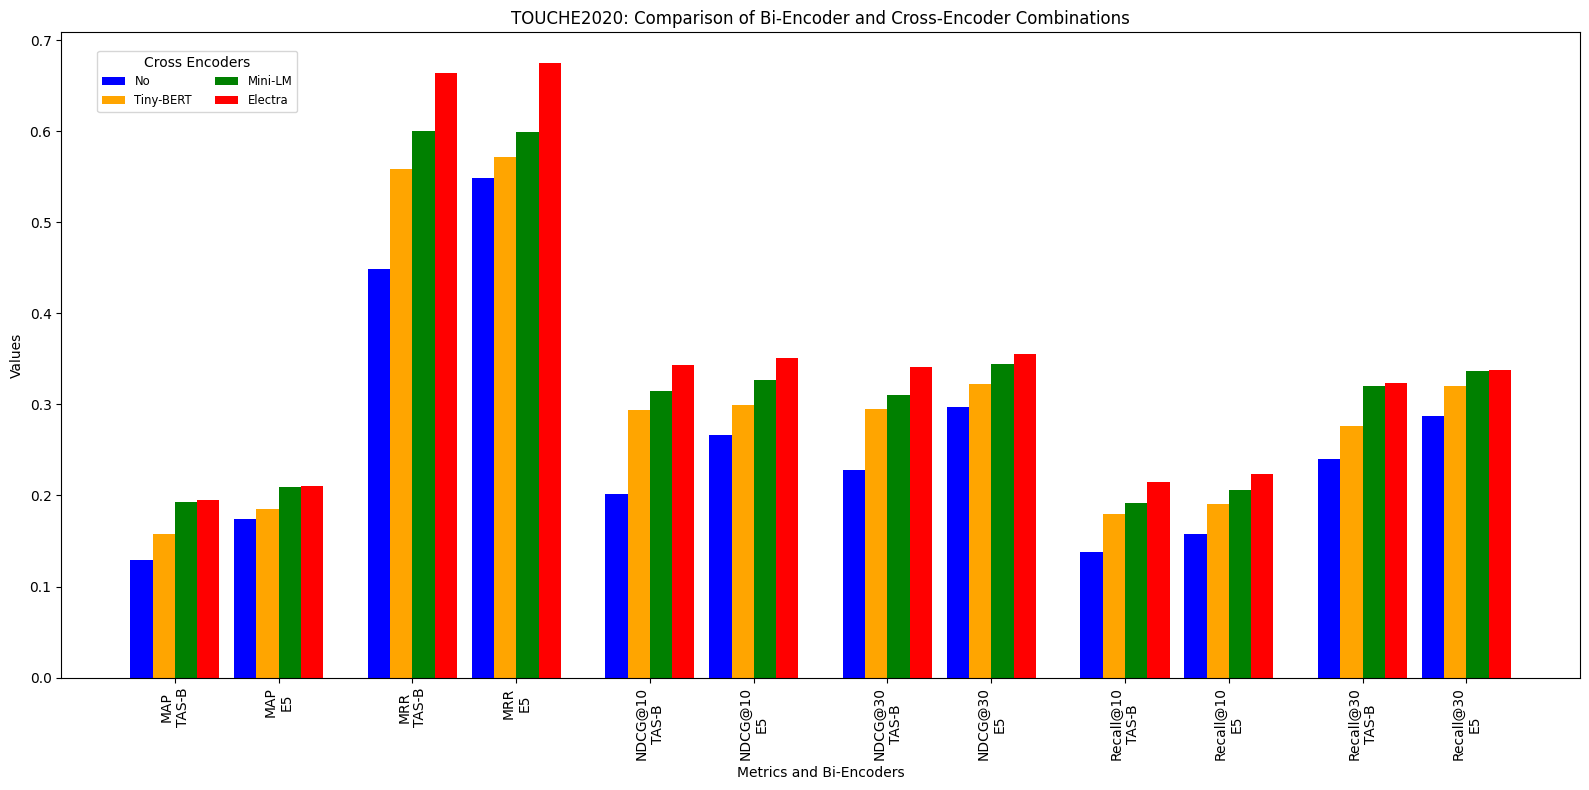

In [42]:
dataset_name = 'TOUCHE2020'

# Filter the data for TOUCHE2020 dataset without fine-tuning
filtered_data = data[
    (data['Dataset'] == dataset_name) & (data['Fine-Tuned'] == 'No')
]

# Select bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Specify bi-encoders to ensure the order
cross_encoders = ['No', 'Tiny-BERT', 'Mini-LM', 'Electra']  # Specify cross-encoders in the required order
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Prepare data for plotting
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.2  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Create x positions for bars
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder in cross_encoders:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoders)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoders) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.15  # Width of each bar
colors = ['blue', 'orange', 'green', 'red']  # Ensure consistent colors for cross-encoders

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoders) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoders[j]}" if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title(f'{dataset_name}: Comparison of Bi-Encoder and Cross-Encoder Combinations')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoders):(i + 1) * len(cross_encoders)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend inside the plot, in the upper left corner
ax.legend(
    title='Cross Encoders',
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()

# Part 3: Fine Tuning Cross-Encoders

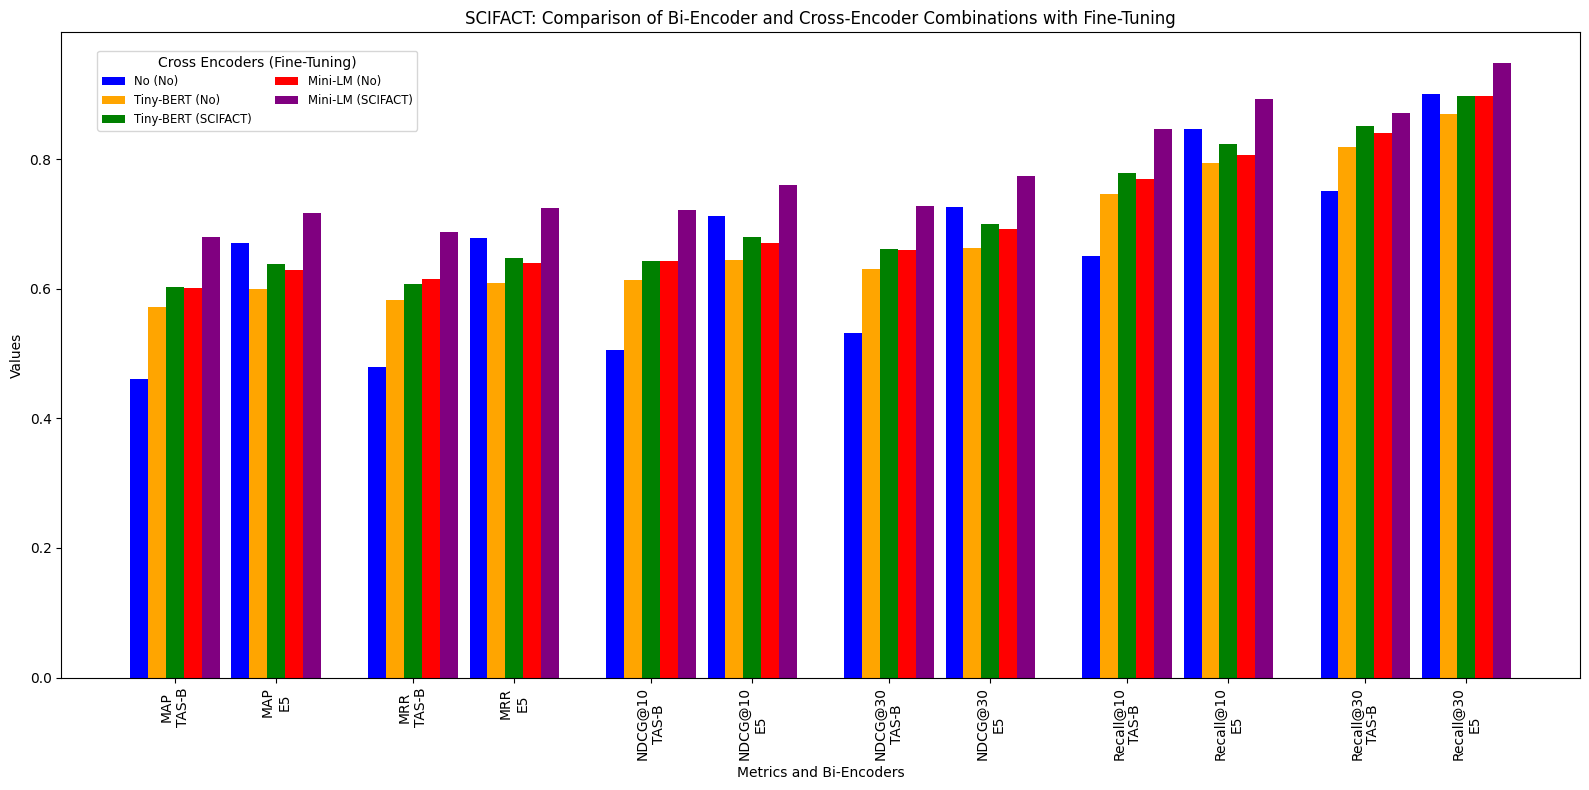

In [55]:
# Filter data for SCIFACT dataset
filtered_data = data[(data['Dataset'] == 'SCIFACT')]

# Define bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Bi-encoders
cross_encoder_finetune_combinations = [
    ('No', 'No'),
    ('Tiny-BERT', 'No'),
    ('Tiny-BERT', 'SCIFACT'),
    ('Mini-LM', 'No'),
    ('Mini-LM', 'SCIFACT')
]  # Cross-encoder and fine-tuning combinations
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Initialize data for the plot
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.3  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Prepare data for plotting
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder, fine_tuned in cross_encoder_finetune_combinations:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder) &
                (filtered_data['Fine-Tuned'] == fine_tuned)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoder_finetune_combinations)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoder_finetune_combinations) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.15  # Width of each bar
colors = ['blue', 'orange', 'green', 'red', 'purple']  # Colors for combinations

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoder_finetune_combinations) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoder_finetune_combinations[j][0]} ({cross_encoder_finetune_combinations[j][1]})"
            if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title('SCIFACT: Comparison of Bi-Encoder and Cross-Encoder Combinations with Fine-Tuning')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoder_finetune_combinations):(i + 1) * len(cross_encoder_finetune_combinations)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend inside the plot, in the upper left corner
ax.legend(
    title='Cross Encoders (Fine-Tuning)',
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()

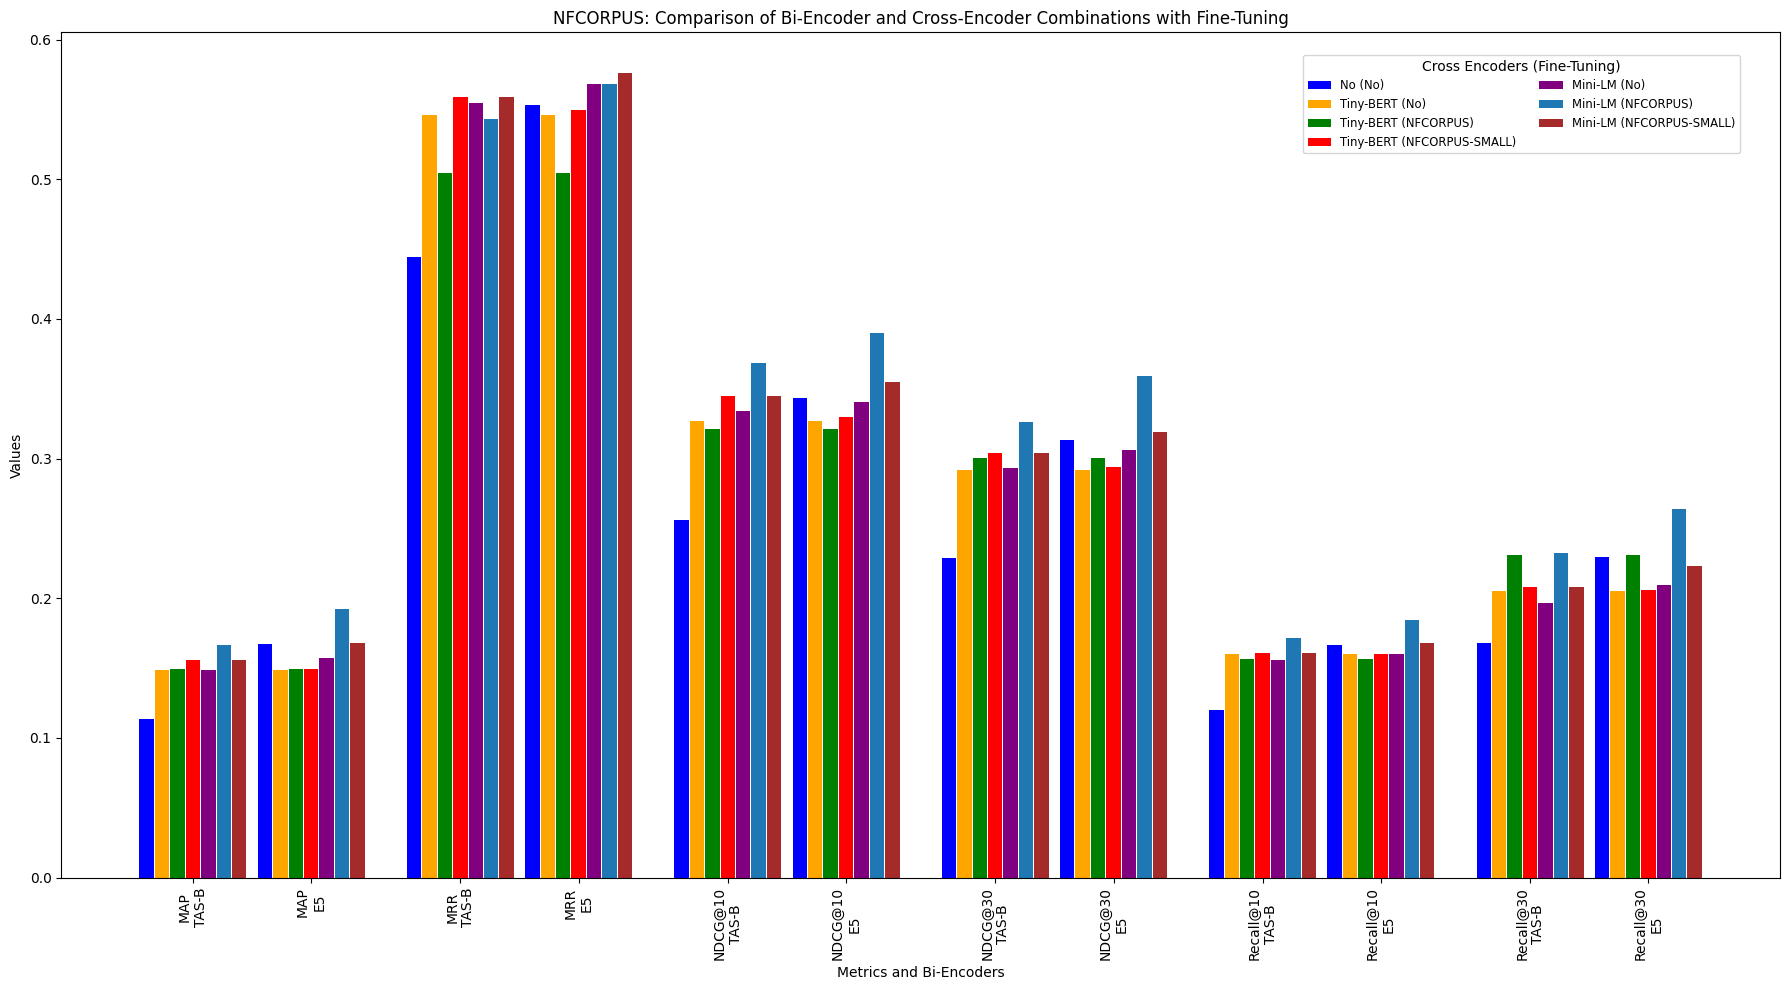

In [59]:
# Filter data for NFCORPUS dataset
filtered_data = data[(data['Dataset'] == 'NFCORPUS')]

# Define bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Bi-encoders
cross_encoder_finetune_combinations = [
    ('No', 'No'),
    ('Tiny-BERT', 'No'),
    ('Tiny-BERT', 'NFCORPUS'),
    ('Tiny-BERT', 'NFCORPUS-SMALL'),
    ('Mini-LM', 'No'),
    ('Mini-LM', 'NFCORPUS'),
    ('Mini-LM', 'NFCORPUS-SMALL')
]  # Cross-encoder and fine-tuning combinations
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Initialize data for the plot
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.3  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Prepare data for plotting
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder, fine_tuned in cross_encoder_finetune_combinations:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder) &
                (filtered_data['Fine-Tuned'] == fine_tuned)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoder_finetune_combinations)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoder_finetune_combinations) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))
bar_width = 0.14  # Width of each bar
colors = ['blue', 'orange', 'green', 'red', 'purple', '#1f78b4', 'brown']  # Updated colors

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoder_finetune_combinations) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoder_finetune_combinations[j][0]} ({cross_encoder_finetune_combinations[j][1]})"
            if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title('NFCORPUS: Comparison of Bi-Encoder and Cross-Encoder Combinations with Fine-Tuning')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoder_finetune_combinations):(i + 1) * len(cross_encoder_finetune_combinations)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend in the upper right corner
ax.legend(
    title='Cross Encoders (Fine-Tuning)',
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()

# Part 4: Generalization

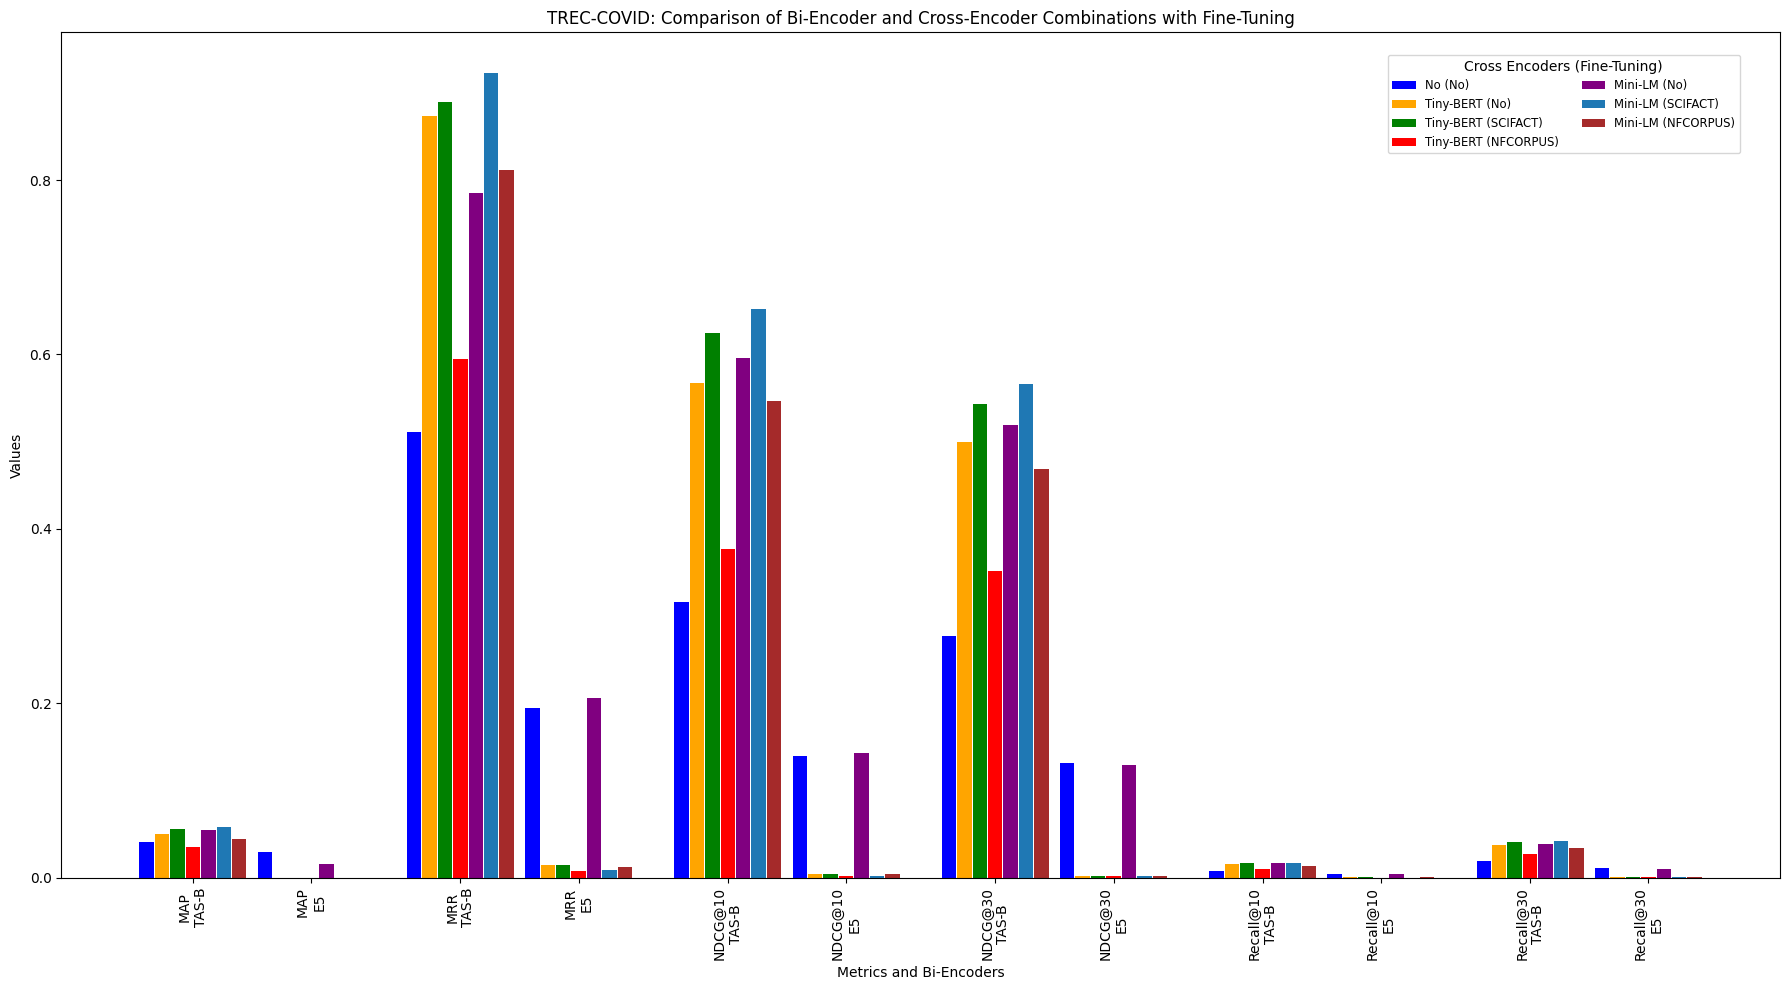

In [60]:
# Filter data for TREC-COVID dataset
filtered_data = data[(data['Dataset'] == 'TREC-COVID')]

# Define bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Bi-encoders
cross_encoder_finetune_combinations = [
    ('No', 'No'),
    ('Tiny-BERT', 'No'),
    ('Tiny-BERT', 'SCIFACT'),
    ('Tiny-BERT', 'NFCORPUS'),
    ('Mini-LM', 'No'),
    ('Mini-LM', 'SCIFACT'),
    ('Mini-LM', 'NFCORPUS')
]  # Cross-encoder and fine-tuning combinations
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Initialize data for the plot
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.3  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Prepare data for plotting
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder, fine_tuned in cross_encoder_finetune_combinations:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder) &
                (filtered_data['Fine-Tuned'] == fine_tuned)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoder_finetune_combinations)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoder_finetune_combinations) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))
bar_width = 0.14  # Width of each bar
colors = ['blue', 'orange', 'green', 'red', 'purple', '#1f78b4', 'brown']  # Updated colors

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoder_finetune_combinations) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoder_finetune_combinations[j][0]} ({cross_encoder_finetune_combinations[j][1]})"
            if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title('TREC-COVID: Comparison of Bi-Encoder and Cross-Encoder Combinations with Fine-Tuning')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoder_finetune_combinations):(i + 1) * len(cross_encoder_finetune_combinations)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend in the upper right corner
ax.legend(
    title='Cross Encoders (Fine-Tuning)',
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()

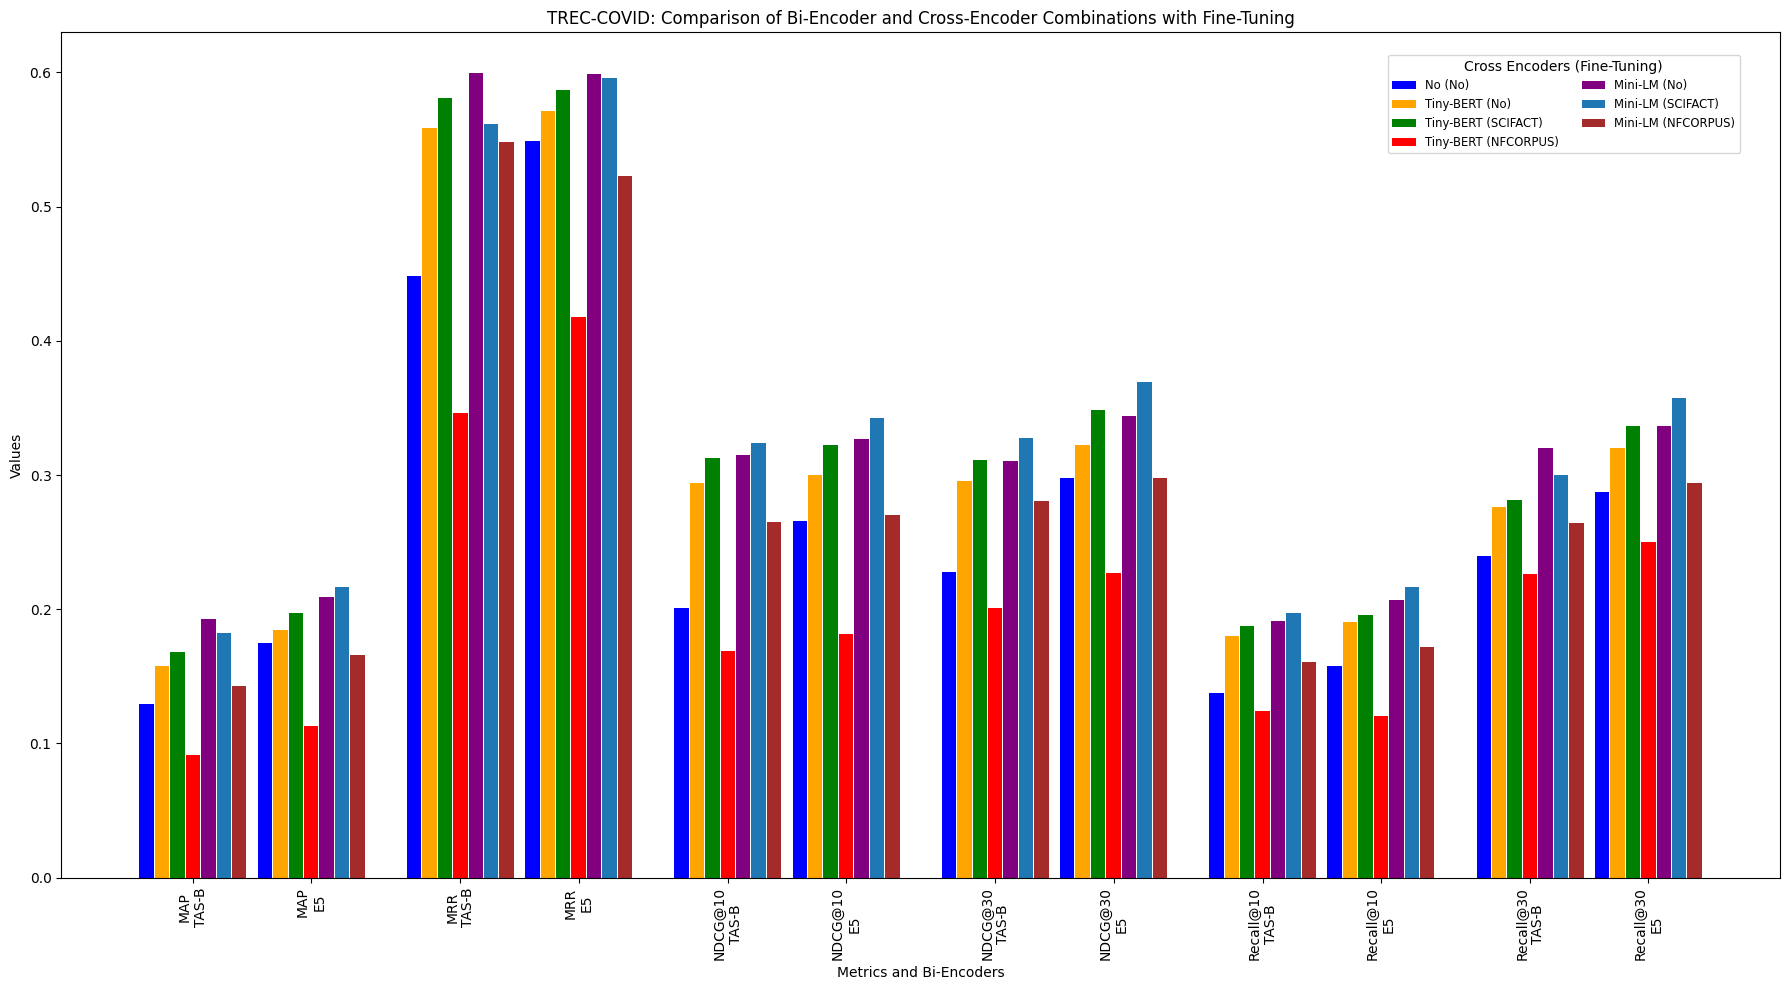

In [61]:
# Filter data for TREC-COVID dataset
filtered_data = data[(data['Dataset'] == 'TOUCHE2020')]

# Define bi-encoders, cross-encoders, and metrics
bi_encoders = ['TAS-B', 'E5']  # Bi-encoders
cross_encoder_finetune_combinations = [
    ('No', 'No'),
    ('Tiny-BERT', 'No'),
    ('Tiny-BERT', 'SCIFACT'),
    ('Tiny-BERT', 'NFCORPUS'),
    ('Mini-LM', 'No'),
    ('Mini-LM', 'SCIFACT'),
    ('Mini-LM', 'NFCORPUS')
]  # Cross-encoder and fine-tuning combinations
metrics = ['MAP', 'MRR', 'NDCG@10', 'NDCG@30', 'Recall@10', 'Recall@30']

# Initialize data for the plot
plot_data = []
xticks = []
x_positions = []
current_x = 0  # Initial x position
group_spacing = 0.3  # Space between metrics
bar_spacing = 0.1  # Space between individual bars

# Prepare data for plotting
for metric in metrics:
    for bi_encoder in bi_encoders:
        group_data = []
        for cross_encoder, fine_tuned in cross_encoder_finetune_combinations:
            combo_data = filtered_data[
                (filtered_data['Bi-Encoder'] == bi_encoder) &
                (filtered_data['Cross-Encoder'] == cross_encoder) &
                (filtered_data['Fine-Tuned'] == fine_tuned)
            ]
            if not combo_data.empty:
                group_data.append(combo_data[metric].values[0])
            else:
                group_data.append(np.nan)  # Fill missing combinations
        plot_data.append(group_data)
        xticks.append(f"{metric}\n{bi_encoder}")
        x_positions.extend(
            current_x + np.arange(len(cross_encoder_finetune_combinations)) * (bar_spacing + 0.05)
        )
        current_x += len(cross_encoder_finetune_combinations) * (bar_spacing + 0.05) + 0.1
    current_x += group_spacing  # Add space between metrics

# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))
bar_width = 0.14  # Width of each bar
colors = ['blue', 'orange', 'green', 'red', 'purple', '#1f78b4', 'brown']  # Updated colors

# Plot data
for i, group_data in enumerate(plot_data):
    for j, value in enumerate(group_data):
        x_value = x_positions[i * len(cross_encoder_finetune_combinations) + j]
        ax.bar(
            x_value,
            value,
            bar_width,
            color=colors[j % len(colors)],  # Cycle through colors
            label=f"{cross_encoder_finetune_combinations[j][0]} ({cross_encoder_finetune_combinations[j][1]})"
            if i == 0 else None,  # Add label only for the first group
        )

# Add labels, title, and legend
ax.set_xlabel('Metrics and Bi-Encoders')
ax.set_ylabel('Values')
ax.set_title('TREC-COVID: Comparison of Bi-Encoder and Cross-Encoder Combinations with Fine-Tuning')
ax.set_xticks(
    [
        np.mean(
            x_positions[i * len(cross_encoder_finetune_combinations):(i + 1) * len(cross_encoder_finetune_combinations)]
        )
        for i in range(len(plot_data))
    ]
)
ax.set_xticklabels(xticks, rotation=90)

# Place the legend in the upper right corner
ax.legend(
    title='Cross Encoders (Fine-Tuning)',
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    ncol=2,
    fontsize='small',
)

# Adjust layout
plt.tight_layout()
plt.show()